# STAT650 - Midterm Project

*Developed by (Name: Aneesha Arora - 733009330)* 


## 1. Introduction

- Write a short introduction/background about your data. (include information of data source )
- what is your research objective(s) and goal(s)

### EDA Hypotheses (Ask you questions)

## 1. Introduction 

## 1.1 Source
* https://archive.ics.uci.edu/dataset/320/student+performance

* The dataset used for this analysis is the Student Performance dataset, available from the UCI Machine Learning Repository. The original dataset was collected from secondary school students in Portugal.

## 1.2 Description
* This dataset contains information about student performance in two subjects: Mathematics and Portuguese language.
* It includes various attributes related to students' demographic information, family background, study habits, and academic performance.
* The dataset comprises 395 student records for Mathematics and 649 for Portuguese, with a total of 33 attributes for each student.
* I have chosen the Mathematics dataset, which consists of 395 student records and 33 attributes per student, allowing for an in-depth analysis of factors that influence math performance.

## 1.3 Research objectives and goals
The primary objectives of this analysis are:

* Investigate the relationship between factors such as study time, family support, and self-reported health with student academic performance.
* Identify disparities in achievement based on demographics including gender, age, family background, and health status.
* Develop insights to improve student performance and inform recommendations for both educational and health-related interventions.
* For example, if students with greater parental support or better self-reported health tend to achieve higher grades, it may be beneficial to implement programs that encourage increased parental involvement and promote overall student well-being alongside academic support.

## 1.4 Reason/Interest
* The student performance dataset was selected because it offers comprehensive, real-world insights into factors affecting academic success in secondary education.
* With detailed information on demographics, family background, study habits, and self-reported well-being, this dataset enables an in-depth examination of how these variables interact to influence final grades in Mathematics.
* The findings from this analysis can inform targeted interventions and educational policies aimed at enhancing academic outcomes and overall student well-being.
  
 ## EDA Hypotheses (Ask you questions)
* Q1: Which study time category is most preferred by students in each age group and gender?
* Q2: Is there evidence to suggest that higher levels of parental education or stronger family support lead to improved final grades?
* Q3: What are the average number of absences for male students aged 16–18, and how does this compare with the same age group of female students?
* Q4: How does internet access influence the distribution of final grades across different socioeconomic backgrounds?
* Q5: What is the relationship between study time and academic performance, and does this relationship vary significantly across different demographic groups?
* Q6: How does self-reported health relate to final grades, and does this relationship differ by gender?
* Q7: How does travel time to school relate to final grades, and do these patterns differ across demographic groups (e.g., gender or age)?

## 2. Data Analysis

### 2-1. Importing the libraries necessary for your EDA



In [259]:
# Import libraries for EDA

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For inline plotting in Jupyter/Colab

%matplotlib inline
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

# Additional libraries that might be useful for the student dataset
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### 2-2. Import data for EDA


In [5]:
# Import your data easy to read

df = pd.read_csv("C:/Users/anear/Downloads/student.csv")


### 2-3. Review Data


In [258]:
# 1. Check data dimension by using .shape
df.shape

(395, 33)

Shape of dataframe

*   395 rows
*   33 columns

In [260]:
# 2. Check types of data by .info() ; .dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Quantitative attributes (Dtype is int)
* age
* absences
* G1 (first period grade)
* G2 (second period grade)
* G3 (final grade)

# Qualitative attributes (Dtype is object)
* school (student's school)
* sex
* address (student's home address type)
* famsize (family size)
* Pstatus (parent's cohabitation status)
* Medu (mother's education)
* Fedu (father's education)
* Mjob (mother's job)
* Fjob (father's job)
* reason (reason to choose this school)
* guardian
* traveltime
* studytime
* failures (number of past class failures)
* schoolsup (extra educational support)
* famsup (family educational support)
* paid (extra paid classes)
* activities (extra-curricular activities)
* nursery (attended nursery school)
* higher (wants higher education)
* internet (Internet access at home)
* romantic (with a romantic relationship)
* famrel (quality of family relationships)
* freetime
* goout (going out with friends)
* Dalc (workday alcohol consumption)
* Walc (weekend alcohol consumption)
* health (current health status)


In [263]:
# 3. For quantitative variable, generate a table for the count, mean, standard deviation, minimum and maximum values and the quantities of the data
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### 2-4. Generate Sub-dataset

In [243]:
# 1. Make sub-dataset(s) from your original dataset for your research objective, goals by dropping unnecessary variables 
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


* The original dataset contains 33 features, and by intuition, most features appear important for understanding student performance. Therefore, we will keep all features for now.

* Additionally, there is an opportunity to generate new features that provide more meaningful insights. For example, creating a grade_group column to categorize students' final grades (G3) into qualitative groups like "Failing," "Average," and "Excellent."

In [265]:
# Creating a new column 'grade_group' based on final grade (G3)
def get_grade_group(grade):
    if grade < 10:
        return "Failing"
    elif 10 <= grade < 15:
        return "Average"
    else:
        return "Excellent"

# Apply the function to create the new column
df['grade_group'] = df['G3'].apply(get_grade_group)



# Display the count of each grade group
print(df['grade_group'].value_counts())


grade_group
Average      192
Failing      130
Excellent     73
Name: count, dtype: int64


* A new qualitative feature grade_group is created. 

             school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  \
grade_group                                                                  
Average         192  192  192      192      192      192   192   192   192   
Excellent        73   73   73       73       73       73    73    73    73   
Failing         130  130  130      130      130      130   130   130   130   

             Fjob  ...  famrel  freetime  goout  Dalc  Walc  health  absences  \
grade_group        ...                                                          
Average       192  ...     192       192    192   192   192     192       192   
Excellent      73  ...      73        73     73    73    73      73        73   
Failing       130  ...     130       130    130   130   130     130       130   

              G1   G2   G3  
grade_group                 
Average      192  192  192  
Excellent     73   73   73  
Failing      130  130  130  

[3 rows x 33 columns]


<Figure size 800x600 with 0 Axes>

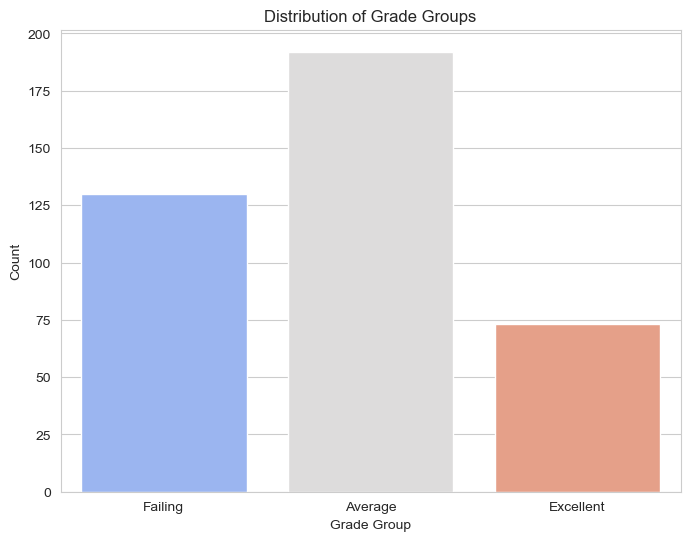

In [271]:
# Group by 'grade_group' and count other features
print(df.groupby(['grade_group']).count())

# Visualize the distribution of grade groups
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='grade_group', palette='coolwarm')
plt.title('Distribution of Grade Groups')
plt.xlabel('Grade Group')
plt.ylabel('Count')
plt.show();

*   Check the count of different grade_group vs all other features.

In [269]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,study_time_label,absences_binned,age_group,grade_category,traveltime_text
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,6,5,6,6,2–5 hours,6-10,18-19,Low,15-30 min
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,4,5,5,6,2–5 hours,0-5,16-17,Low,<15 min
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,10,7,8,10,2–5 hours,6-10,<=15,High,<15 min
3,GP,F,15,U,GT3,T,4,2,health,services,...,5,2,15,14,15,5–10 hours,0-5,<=15,High,<15 min
4,GP,F,16,U,GT3,T,3,3,other,other,...,5,4,6,10,10,2–5 hours,0-5,16-17,High,<15 min


In [291]:
# 2. try to change variable names

# Renaming columns for better readability
df = df.rename(columns={
    "Medu": "mother_education",
    "Fedu": "father_education",
    "Mjob": "mother_job",
    "Fjob": "father_job",
    "studytime": "study_time",
    "schoolsup": "school_support",
    "famsup": "family_support"
})

# Display the first few rows to confirm changes
df.head(6)


,school,sex,age,address,famsize,Pstatus,mother_education,father_education,mother_job,father_job,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grade_group
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Failing
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Failing
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Average
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Excellent
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Average
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,Excellent


* df.rename() is used to rename column names.

### The following changes were made:

* "Medu" to "mother_education"

* "Fedu"  "father_education"

* "Mjob"  "mother_job"

* "Fjob"  "father_job"

* "studytime"  "study_time"

* "schoolsup"  "school_support"

* "famsup"  "family_support"

In [296]:
df.count()

school              395
sex                 395
age                 395
address             395
famsize             395
Pstatus             395
mother_education    395
father_education    395
mother_job          395
father_job          395
reason              395
guardian            395
traveltime          395
study_time          395
failures            395
school_support      395
family_support      395
paid                395
activities          395
nursery             395
higher              395
internet            395
romantic            395
famrel              395
freetime            395
goout               395
Dalc                395
Walc                395
health              395
absences            395
G1                  395
G2                  395
G3                  395
grade_group         395
dtype: int64

*   df.count() provides count of non-null values in each column.

In [299]:
# 3. check if there are missing values

df.isnull().sum()

school              0
sex                 0
age                 0
address             0
famsize             0
Pstatus             0
mother_education    0
father_education    0
mother_job          0
father_job          0
reason              0
guardian            0
traveltime          0
study_time          0
failures            0
school_support      0
family_support      0
paid                0
activities          0
nursery             0
higher              0
internet            0
romantic            0
famrel              0
freetime            0
goout               0
Dalc                0
Walc                0
health              0
absences            0
G1                  0
G2                  0
G3                  0
grade_group         0
dtype: int64

*   df.isnull.sum() provides a sum of null values in each column.
*   df.unique() prints unique elements in the series or data frame.

In [272]:
# Check unique values in the 'school' column
print("Unique values in 'school':", df['school'].unique())

Unique values in 'school': ['GP' 'MS']


In [278]:
df['Mjob'].replace('?', 'Unknown', inplace=True)
df['Fjob'].replace('?', 'Unknown', inplace=True)

In [305]:
# Check unique values in the 'sex' column
print("Unique values in 'sex':", df['sex'].unique())

Unique values in 'sex': ['F' 'M']


In [307]:
# Check unique values in the 'address' column
print("Unique values in 'address':", df['address'].unique())

Unique values in 'address': ['U' 'R']


In [309]:
# Check unique values in the 'Mjob' (Mother's job) column
print("Unique values in 'mother_job':", df['mother_job'].unique())

Unique values in 'mother_job': ['at_home' 'health' 'other' 'services' 'teacher']


In [311]:
# Check unique values in the 'Fjob' (Father's job) column
print("Unique values in 'father_job':", df['father_job'].unique())

Unique values in 'father_job': ['teacher' 'other' 'services' 'health' 'at_home']


In [313]:
# Check unique values in the 'higher' column (whether students want higher education)
print("Unique values in 'higher':", df['higher'].unique())

Unique values in 'higher': ['yes' 'no']


In [289]:
df = df.dropna()

* df.dropna() removes row with null values.
* The unique values also contains '?' which is replaced with 'Unknown'
* The presence of '?' means there are columns with unknown values so null values are dropped.

* After examining the dataset, we confirmed that there were no missing or unknown values represented by '?'. Therefore, no replacements or modifications were necessary.

In [190]:
# 4. Check if there are duplicated values

def check_repeat_rows(df):
    actual_rows_count = len(df)
    unique_rows_count = len(df.drop_duplicates())
    print("Number of repeated rows: {}".format(actual_rows_count - unique_rows_count))

*   df.drop_duplicates() drops duplicated rows from dataframe.

In [322]:
check_repeat_rows(df)

Number of repeated rows: 0


In [324]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,mother_education,father_education,mother_job,father_job,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grade_group
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Failing
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Failing
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Average
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Excellent
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Average


In [326]:
df.count()

school              395
sex                 395
age                 395
address             395
famsize             395
Pstatus             395
mother_education    395
father_education    395
mother_job          395
father_job          395
reason              395
guardian            395
traveltime          395
study_time          395
failures            395
school_support      395
family_support      395
paid                395
activities          395
nursery             395
higher              395
internet            395
romantic            395
famrel              395
freetime            395
goout               395
Dalc                395
Walc                395
health              395
absences            395
G1                  395
G2                  395
G3                  395
grade_group         395
dtype: int64

#### Quantitative variables after removing duplicated and replacing null values:

* age
* Medu (mother's education)
* Fedu (father's education)
* studytime (coded study time)
* failures (number of past class failures)
* famrel (quality of family relationships)
* freetime (amount of free time after school)
* traveltime (commute duration: 1 = <15 min, 2 = 15–30 min, 3 = 30–60 min, 4 = >60 min)
* goout (frequency of going out with friends)
* Dalc (workday alcohol consumption)
* Walc (weekend alcohol consumption)
* health (self-reported health status)
* absences (number of school absences)
* G1 (first period grade)
* G2 (second period grade)
* G3 (final grade)

### 2-5. Checking Outliers

*   seaborn.boxplot() - Draw a box plot to show distributions with respect to categories.

<Figure size 800x600 with 0 Axes>

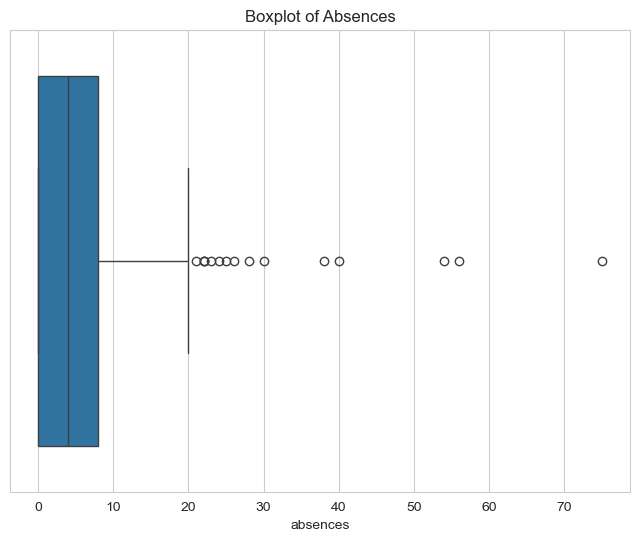

In [335]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for outliers in quantitative variables using boxplots

# Absences
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['absences'])
plt.title('Boxplot of Absences')
plt.show();

In [339]:
#For absences
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['absences'][(df['absences'] < (Q1 - 1.5 * IQR)) |(df['absences'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(15,)


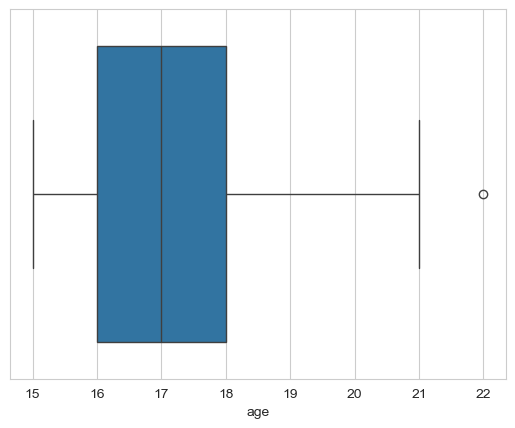

In [347]:
sns.boxplot(x=df['age'])
plt.show()

In [343]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['age'][(df['age'] < (Q1 - 1.5 * IQR)) |(df['age'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(1,)


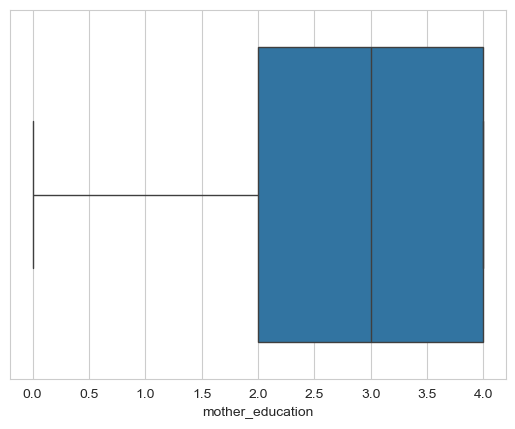

In [349]:
sns.boxplot(x=df['mother_education'])
plt.show()

In [353]:
Q1 = df['mother_education'].quantile(0.25)
Q3 = df['mother_education'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['mother_education'][(df['mother_education'] < (Q1 - 1.5 * IQR)) |(df['mother_education'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(0,)


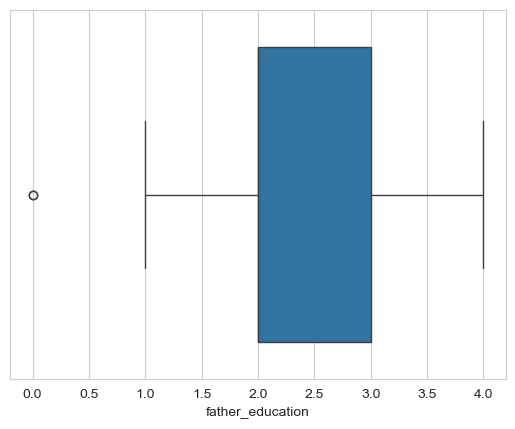

In [355]:
sns.boxplot(x=df['father_education'])
plt.show()

In [357]:
Q1 = df['father_education'].quantile(0.25)
Q3 = df['father_education'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['father_education'][(df['father_education'] < (Q1 - 1.5 * IQR)) |(df['father_education'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(2,)


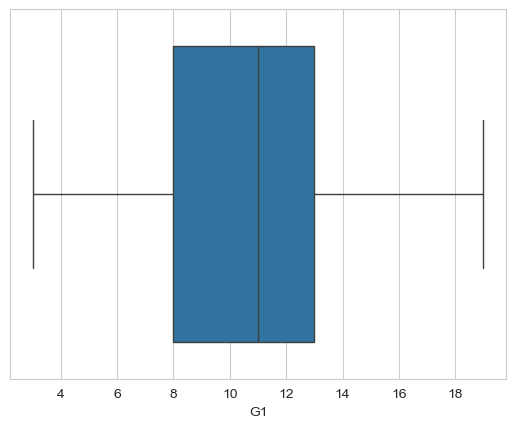

In [359]:
sns.boxplot(x=df['G1'])
plt.show()

In [361]:
Q1 = df['G1'].quantile(0.25)
Q3 = df['G1'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['G1'][(df['G1'] < (Q1 - 1.5 * IQR)) |(df['G1'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(0,)


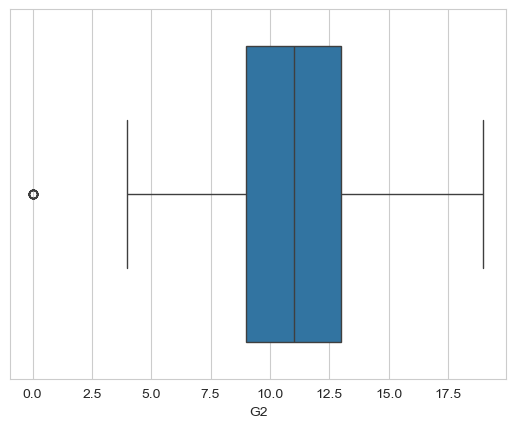

In [363]:
sns.boxplot(x=df['G2'])
plt.show()

In [365]:
Q1 = df['G2'].quantile(0.25)
Q3 = df['G2'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['G2'][(df['G2'] < (Q1 - 1.5 * IQR)) |(df['G2'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(13,)


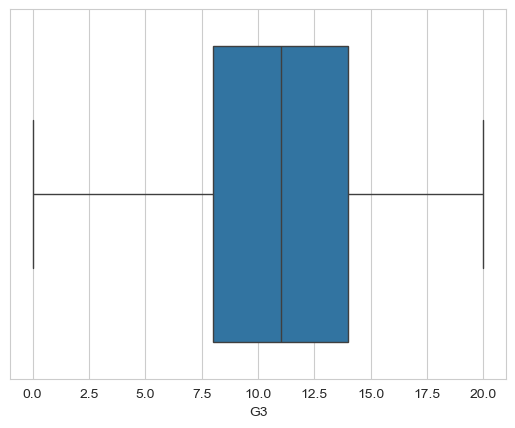

In [367]:
sns.boxplot(x=df['G3'])
plt.show()

In [369]:
Q1 = df['G3'].quantile(0.25)
Q3 = df['G3'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['G3'][(df['G3'] < (Q1 - 1.5 * IQR)) |(df['G3'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(0,)


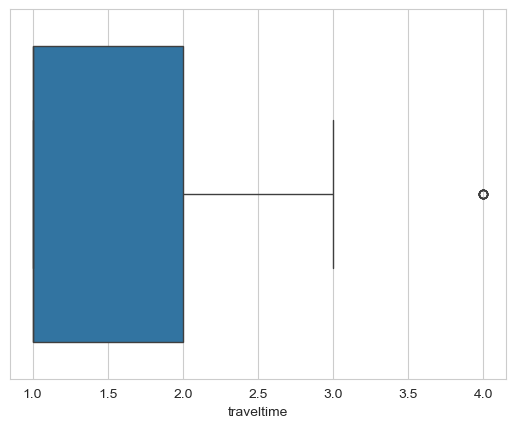

In [371]:
sns.boxplot(x=df['traveltime'])
plt.show()

In [373]:
Q1 = df['traveltime'].quantile(0.25)
Q3 = df['traveltime'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['traveltime'][(df['traveltime'] < (Q1 - 1.5 * IQR)) |(df['traveltime'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(8,)


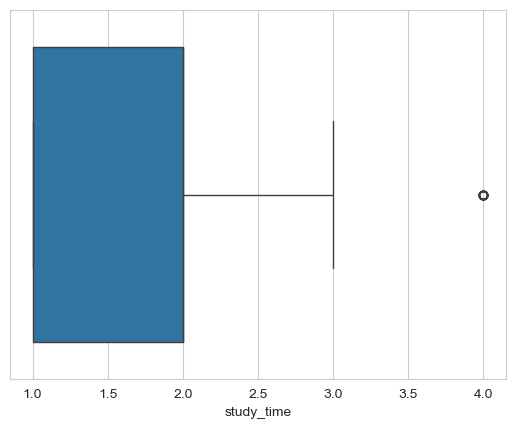

In [375]:
sns.boxplot(x=df['study_time'])
plt.show()

In [379]:
Q1 = df['study_time'].quantile(0.25)
Q3 = df['study_time'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['study_time'][(df['study_time'] < (Q1 - 1.5 * IQR)) |(df['study_time'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(27,)


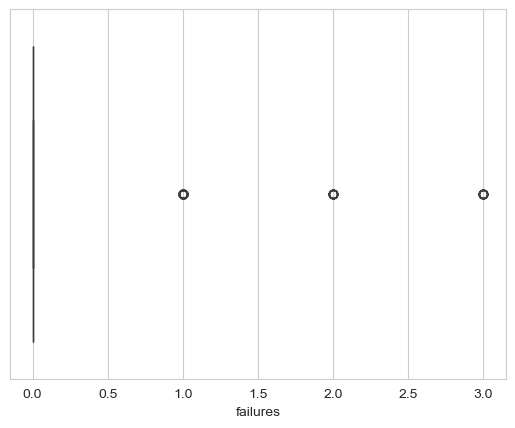

In [312]:
sns.boxplot(x=df['failures'])
plt.show()

In [381]:
Q1 = df['failures'].quantile(0.25)
Q3 = df['failures'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['failures'][(df['failures'] < (Q1 - 1.5 * IQR)) |(df['failures'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(83,)


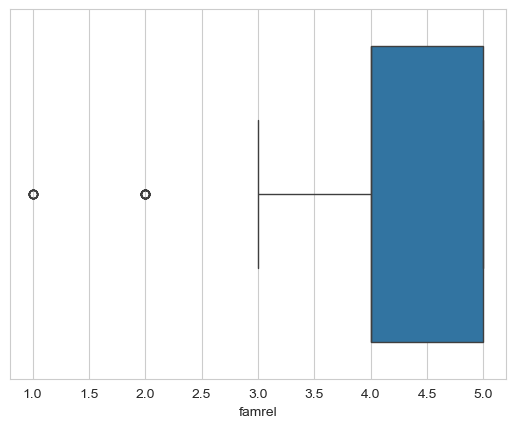

In [316]:
sns.boxplot(x=df['famrel'])
plt.show()

In [314]:
Q1 = df['famrel'].quantile(0.25)
Q3 = df['famrel'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['famrel'][(df['famrel'] < (Q1 - 1.5 * IQR)) | (df['famrel'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(26,)


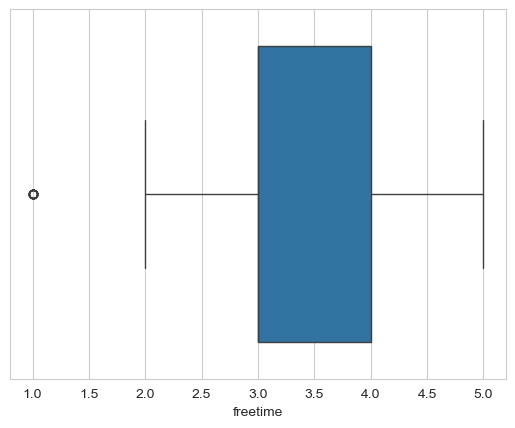

In [319]:
sns.boxplot(x=df['freetime'])
plt.show()

In [321]:
Q1 = df['freetime'].quantile(0.25)
Q3 = df['freetime'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['freetime'][(df['freetime'] < (Q1 - 1.5 * IQR)) | (df['freetime'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(19,)


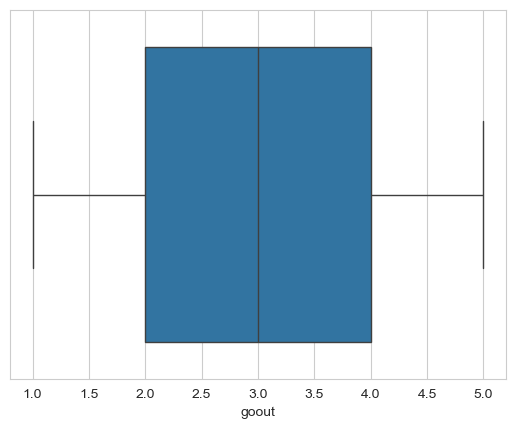

In [323]:
sns.boxplot(x=df['goout'])
plt.show()

In [325]:
Q1 = df['goout'].quantile(0.25)
Q3 = df['goout'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['goout'][(df['goout'] < (Q1 - 1.5 * IQR)) | (df['goout'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(0,)


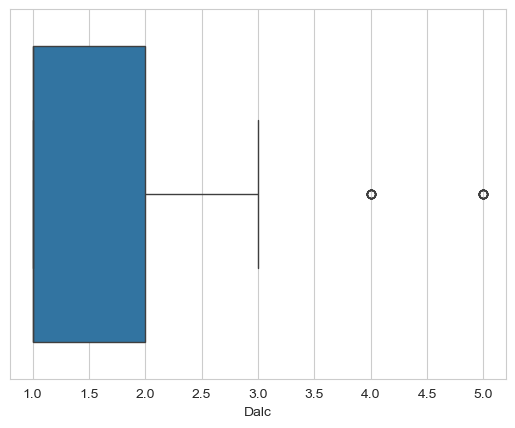

In [327]:
sns.boxplot(x=df['Dalc'])
plt.show()

In [329]:
Q1 = df['Dalc'].quantile(0.25)
Q3 = df['Dalc'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['Dalc'][(df['Dalc'] < (Q1 - 1.5 * IQR)) | (df['Dalc'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(18,)


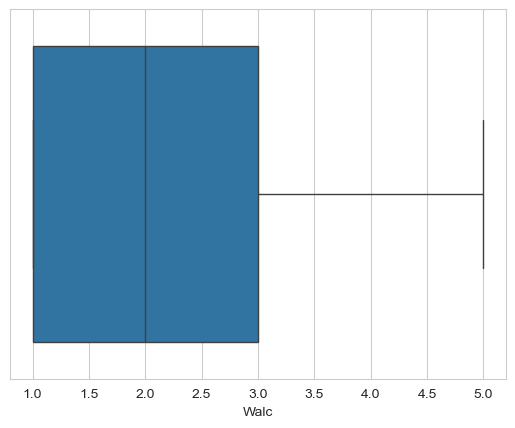

In [331]:
sns.boxplot(x=df['Walc'])
plt.show()

In [333]:
Q1 = df['Walc'].quantile(0.25)
Q3 = df['Walc'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['Walc'][(df['Walc'] < (Q1 - 1.5 * IQR)) | (df['Walc'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(0,)


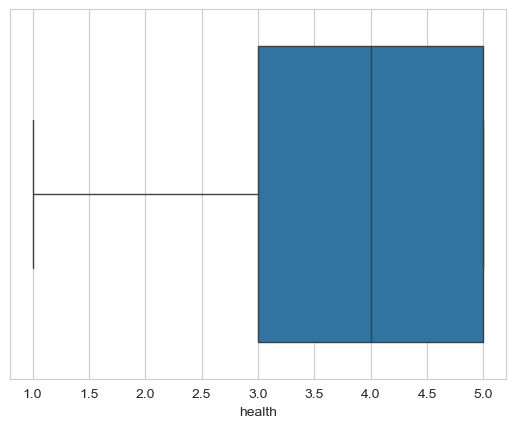

In [335]:
sns.boxplot(x=df['health'])
plt.show()

In [337]:
Q1 = df['health'].quantile(0.25)
Q3 = df['health'].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df['health'][(df['health'] < (Q1 - 1.5 * IQR)) | (df['health'] > (Q3 + 1.5 * IQR))]
print(df_outliers.shape)

(0,)


* The outliers are not removed currently as they can be part of natural variations.
* In the future, an extra assessment might be required with and without outliers to check the impact on efficiency.

### 2-6. Generating Plot(s)

In [9]:
# generate plots to support your objective and goals

grade_distribution = df['G3'].value_counts(normalize=True)
print("Grade Distribution:")
print(grade_distribution)

Grade Distribution:
G3
10    0.141772
11    0.118987
0     0.096203
15    0.083544
8     0.081013
13    0.078481
12    0.078481
9     0.070886
14    0.068354
16    0.040506
6     0.037975
18    0.030380
7     0.022785
5     0.017722
17    0.015190
19    0.012658
20    0.002532
4     0.002532
Name: proportion, dtype: float64


* pandas.Dataframe.value_counts() - Return a pandas series containing the frequency of each distinct row in the dataframe.
* matplot.pyplot.pie() - Creates a pie chart from the given array.
* seaborn.countplot() - Show the counts of observations in each categorical bin using bars.

Percentage Distribution of Final Grades:
G3
10    0.141772
11    0.118987
0     0.096203
15    0.083544
8     0.081013
13    0.078481
12    0.078481
9     0.070886
14    0.068354
16    0.040506
6     0.037975
18    0.030380
7     0.022785
5     0.017722
17    0.015190
19    0.012658
20    0.002532
4     0.002532
Name: proportion, dtype: float64


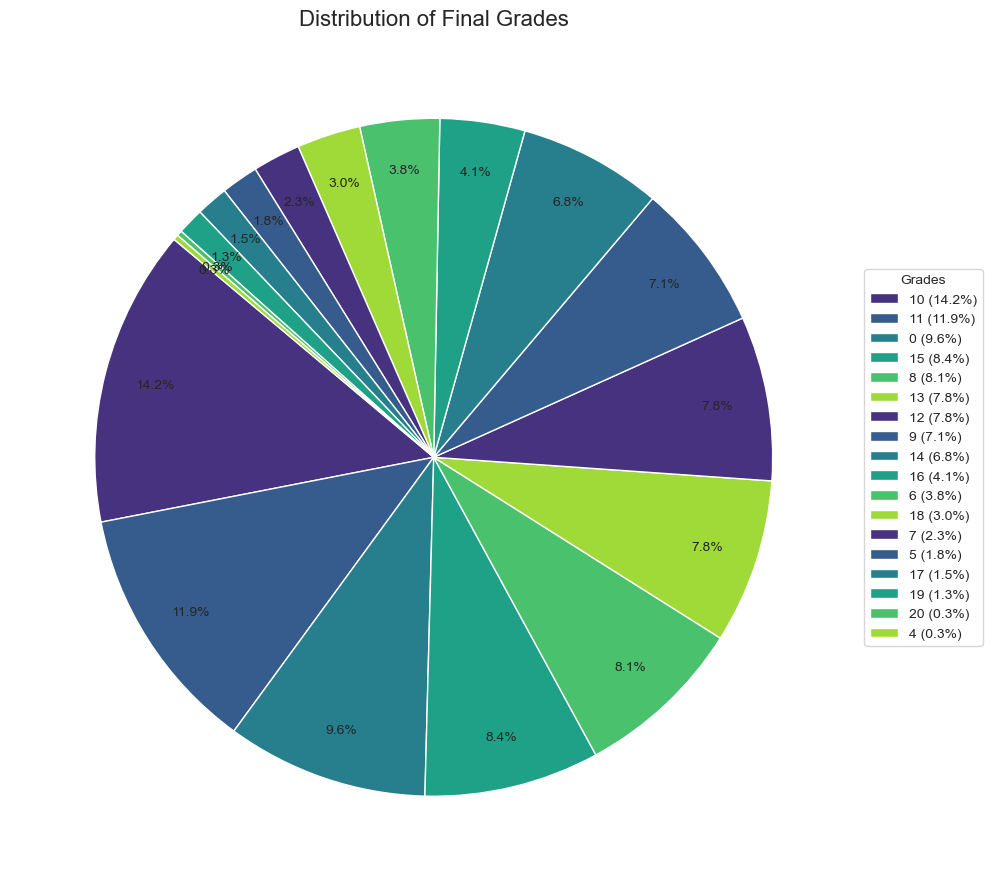

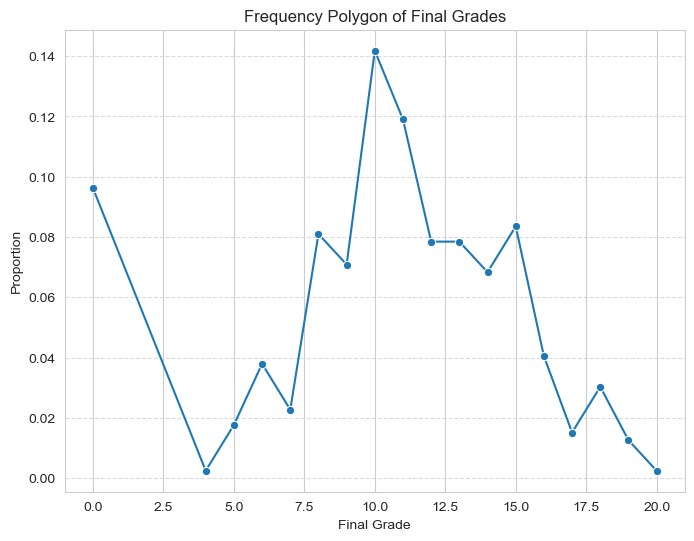

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage distribution of final grades
grade_distribution = df['G3'].value_counts(normalize=True)
print("Percentage Distribution of Final Grades:")
print(grade_distribution)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    grade_distribution, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('viridis'),
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    pctdistance=0.85
)

plt.title('Distribution of Final Grades', fontsize=16)
plt.legend(wedges, labels, title="Grades", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()


# Frequency polygon for final grades
plt.figure(figsize=(8, 6))
sns.lineplot(data=df['G3'].value_counts(normalize=True), marker='o')
plt.title('Frequency Polygon of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Proportion')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



* In the student dataset, the distribution of final grades varies, with approximately 12.3% of students achieving a final grade of 10, while only 0.4% of students achieve a final grade of 5. These numbers is with respect to their frequency. A better presentation would be needed for these variables.

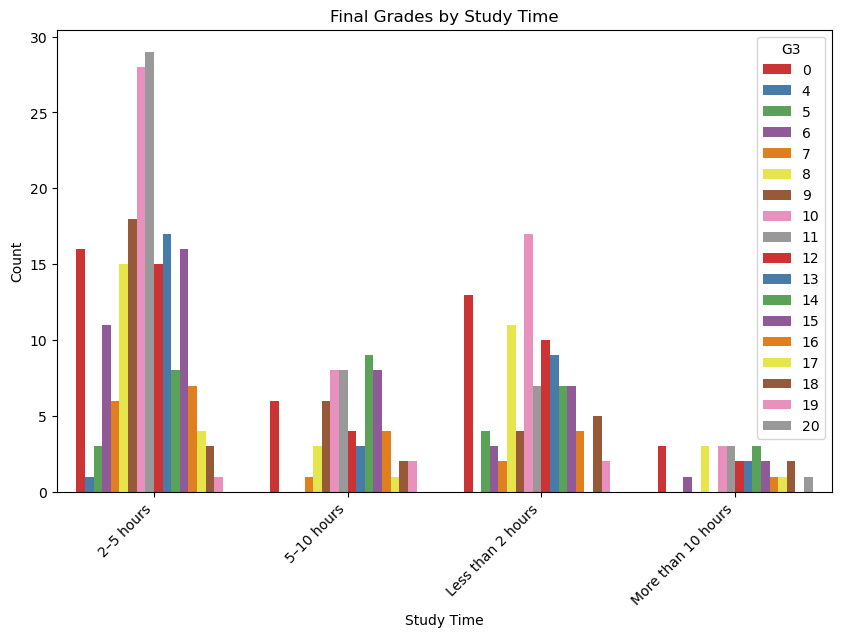

([0, 1, 2, 3], [Text(0, 0, '2–5 hours'), Text(1, 0, '5–10 hours'), Text(2, 0, 'Less than 2 hours'), Text(3, 0, 'More than 10 hours')])


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map numeric study_time codes to descriptive labels
study_time_map = {
    1: 'Less than 2 hours',
    2: '2–5 hours',
    3: '5–10 hours',
    4: 'More than 10 hours'
}

df['study_time_label'] = df['studytime'].map(study_time_map)

# Create a count plot using the new descriptive labels on the x-axis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='study_time_label', hue='G3', palette='Set1')
plt.title('Final Grades by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Count')

# Capture the tick information (positions and Text objects) and rotate the labels
xticks_info = plt.xticks(rotation=45, ha="right")

# Display the plot
plt.show()

# Print the tick information to see an output like:
# (array([...]), [Text(0, 0, '...'), Text(1, 0, '...'), ...])
print(xticks_info)


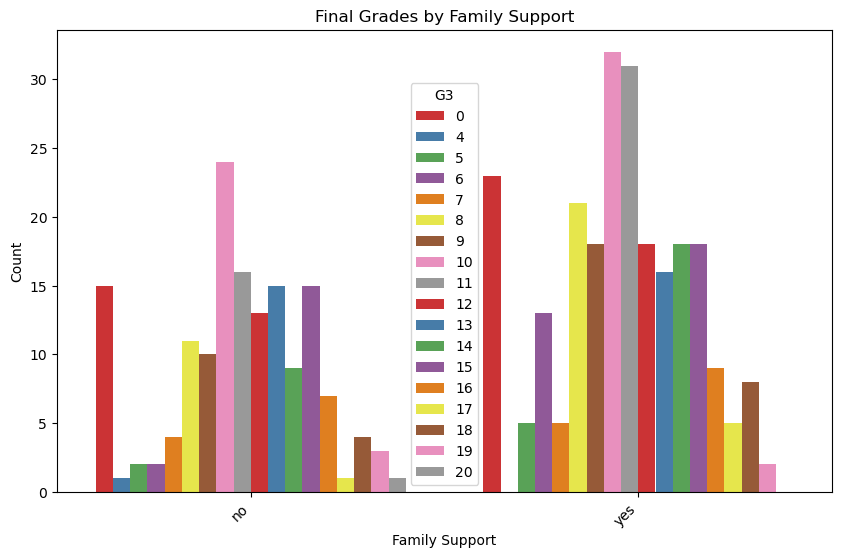

([0, 1], [Text(0, 0, 'no'), Text(1, 0, 'yes')])


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 3: Family Support vs. Final Grade using countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='famsup', hue='G3', palette='Set1')
plt.title('Final Grades by Family Support')
plt.xlabel('Family Support')
plt.ylabel('Count')

# Capture the tick information and rotate the x-axis labels
xticks_info = plt.xticks(rotation=45, ha="right")

plt.show()

# Print out the tick information (positions and Text objects)
print(xticks_info)

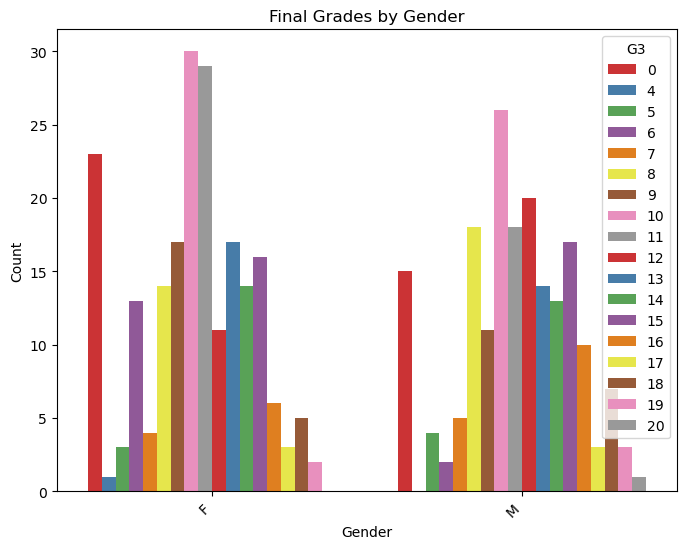

([0, 1], [Text(0, 0, 'F'), Text(1, 0, 'M')])


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 4: Gender vs. Final Grade using countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='G3', palette='Set1')
plt.title('Final Grades by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Capture the tick information (positions and Text objects) and rotate the labels
xticks_info = plt.xticks(rotation=45, ha="right")

# Display the plot
plt.show()

# Print out the tick information
print(xticks_info)

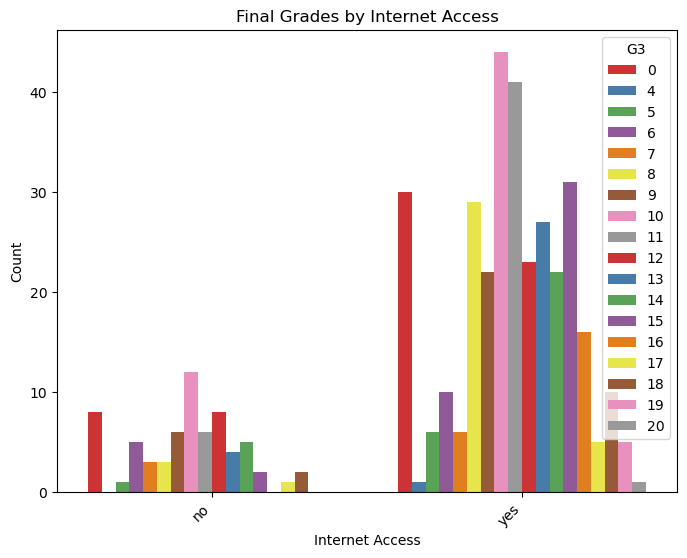

([0, 1], [Text(0, 0, 'no'), Text(1, 0, 'yes')])


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 5: Internet Access vs. Final Grade using countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='internet', hue='G3', palette='Set1')
plt.title('Final Grades by Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Count')

# Capture the tick information (positions and Text objects) and rotate the x-axis labels
xticks_info = plt.xticks(rotation=45, ha="right")

# Display the plot
plt.show()

# Print out the tick information
print(xticks_info)


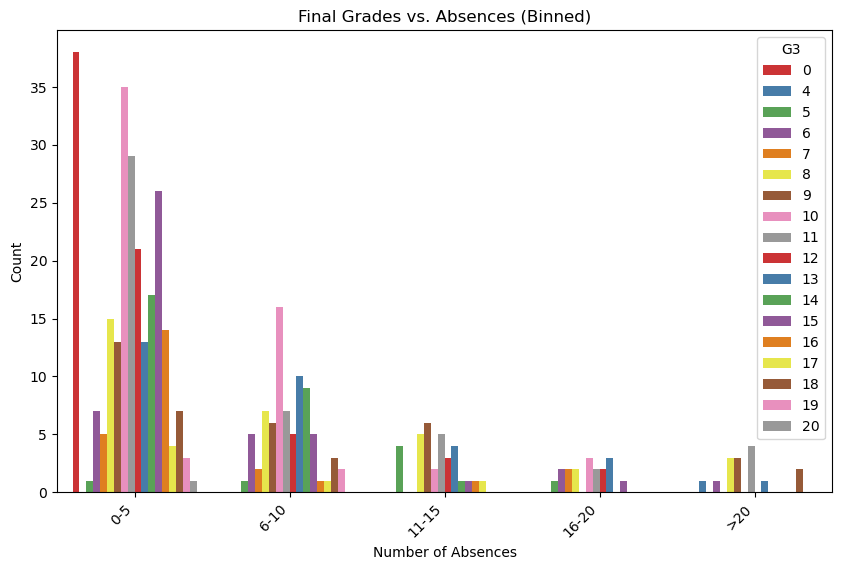

([0, 1, 2, 3, 4], [Text(0, 0, '0-5'), Text(1, 0, '6-10'), Text(2, 0, '11-15'), Text(3, 0, '16-20'), Text(4, 0, '>20')])


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example bin edges and labels for absences
# Adjust the bins to fit your data distribution
bin_edges = [-1, 5, 10, 15, 20, 100]
bin_labels = ['0-5', '6-10', '11-15', '16-20', '>20']

# Create a new column that groups absences into these bins
df['absences_binned'] = pd.cut(df['absences'], bins=bin_edges, labels=bin_labels)

# Now create a count plot using the binned absences
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='absences_binned', hue='G3', palette='Set1')
plt.title('Final Grades vs. Absences (Binned)')
plt.xlabel('Number of Absences')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
xticks_info = plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Print the tick information
print(xticks_info)

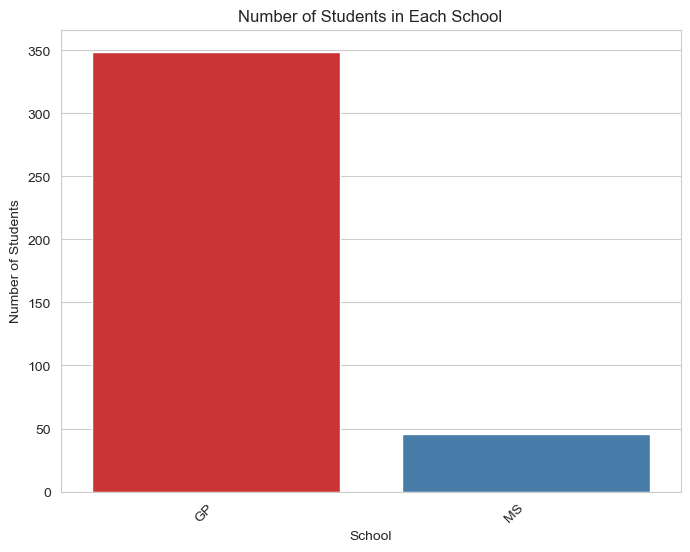

([0, 1], [Text(0, 0, 'GP'), Text(1, 0, 'MS')])


In [355]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 7: School vs. Grade Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='school', palette='Set1')
plt.title('Number of Students in Each School')
plt.xlabel('School')
plt.ylabel('Number of Students')

# Capture the tick information (positions and Text objects) and rotate the x-axis labels
xticks_info = plt.xticks(rotation=45, ha="right")

# Display the plot
plt.show()

# Print out the tick information
print(xticks_info)

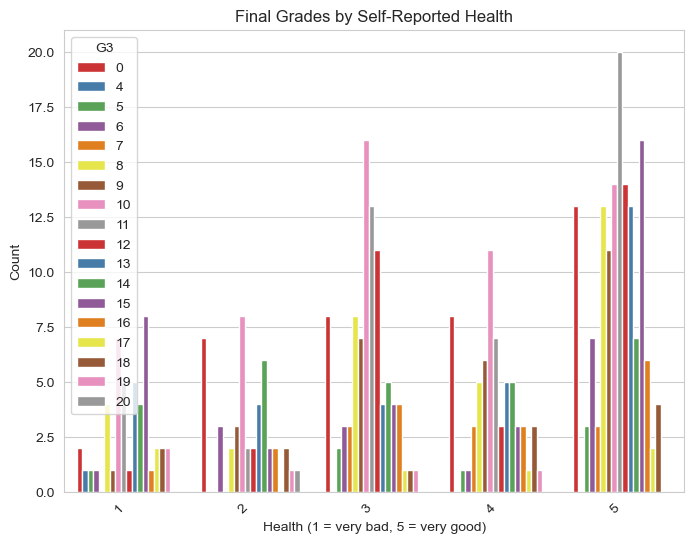

([0, 1, 2, 3, 4], [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4'), Text(4, 0, '5')])


In [357]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Self-Reported Health vs. Final Grade using countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='health', hue='G3', palette='Set1')
plt.title('Final Grades by Self-Reported Health')
plt.xlabel('Health (1 = very bad, 5 = very good)')
plt.ylabel('Count')

# Capture the tick information and rotate the x-axis labels
xticks_info = plt.xticks(rotation=45, ha="right")

# Display the plot
plt.show()

# Print out the tick information
print(xticks_info)


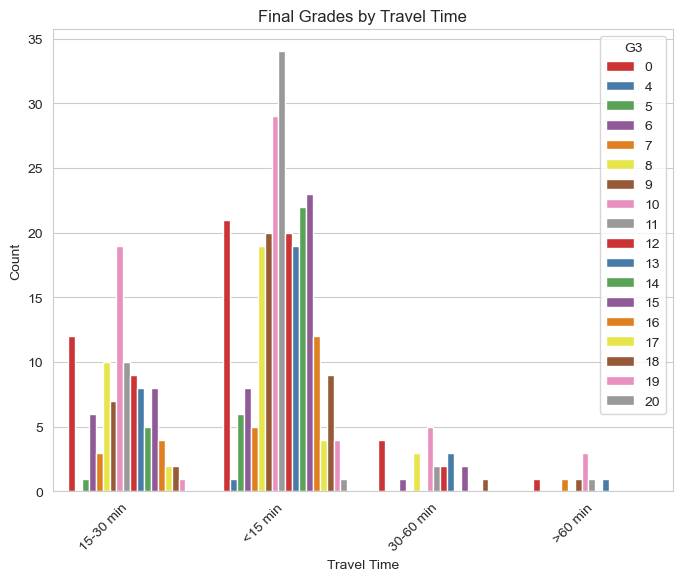

([0, 1, 2, 3], [Text(0, 0, '15-30 min'), Text(1, 0, '<15 min'), Text(2, 0, '30-60 min'), Text(3, 0, '>60 min')])


In [360]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map numeric travel time codes to descriptive text if not already done
traveltime_map = {1: '<15 min', 2: '15-30 min', 3: '30-60 min', 4: '>60 min'}
df['traveltime_text'] = df['traveltime'].map(traveltime_map)

# Plot: Travel Time vs. Final Grade using countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='traveltime_text', hue='G3', palette='Set1')
plt.title('Final Grades by Travel Time')
plt.xlabel('Travel Time')
plt.ylabel('Count')

# Capture tick information and rotate x-axis labels
xticks_info = plt.xticks(rotation=45, ha="right")
plt.show()

# Print out the tick information
print(xticks_info)

## 3. EDA


### Checking what proportion of students in each study time category are achieving different final grades.

* pd.crosstab() builds a cross-tabulation table that displays the distribution of final grade categories across the various study time groups. With normalize='index', it shows the proportion of students achieving each final grade within each study time category rather than the raw counts.

In [29]:
# perform your EDA

import pandas as pd
pd.crosstab(df['study_time_label'], df['G3'], normalize='index')


G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
study_time_label,,,,,,,,,,,,,,,,,,
2–5 hours,0.080808,0.005051,0.015152,0.055556,0.030303,0.075758,0.090909,0.141414,0.146465,0.075758,0.085859,0.040404,0.080808,0.035354,0.020202,0.015152,0.005051,0.000000
5–10 hours,0.092308,0.000000,0.000000,0.000000,0.015385,0.046154,0.092308,0.123077,0.123077,0.061538,0.046154,0.138462,0.123077,0.061538,0.015385,0.030769,0.030769,0.000000
Less than 2 hours,0.123810,0.000000,0.038095,0.028571,0.019048,0.104762,0.038095,0.161905,0.066667,0.095238,0.085714,0.066667,0.066667,0.038095,0.000000,0.047619,0.019048,0.000000
More than 10 hours,0.111111,0.000000,0.000000,0.037037,0.000000,0.111111,0.000000,0.111111,0.111111,0.074074,0.074074,0.111111,0.074074,0.037037,0.037037,0.074074,0.000000,0.037037


### Checking what proportion of students with and without family support are achieving various final grades.

In [32]:
pd.crosstab(df['famsup'], df['G3'], normalize='index')

G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
famsup,,,,,,,,,,,,,,,,,,
no,0.098039,0.006536,0.013072,0.013072,0.026144,0.071895,0.065359,0.156863,0.104575,0.084967,0.098039,0.058824,0.098039,0.045752,0.006536,0.026144,0.019608,0.006536
yes,0.095041,0.000000,0.020661,0.053719,0.020661,0.086777,0.074380,0.132231,0.128099,0.074380,0.066116,0.074380,0.074380,0.037190,0.020661,0.033058,0.008264,0.000000


### Checking what proportion of students by gender are achieving various final grades.

In [362]:
pd.crosstab(df['sex'], df['G3'], normalize='index')

G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
sex,,,,,,,,,,,,,,,,,,
F,0.110577,0.004808,0.014423,0.062500,0.019231,0.067308,0.081731,0.144231,0.139423,0.052885,0.081731,0.067308,0.076923,0.028846,0.014423,0.024038,0.009615,0.000000
M,0.080214,0.000000,0.021390,0.010695,0.026738,0.096257,0.058824,0.139037,0.096257,0.106952,0.074866,0.069519,0.090909,0.053476,0.016043,0.037433,0.016043,0.005348


### Checking what proportion of students with and without internet access are achieving various final grades.

In [38]:
pd.crosstab(df['internet'], df['G3'], normalize='index')

G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
internet,,,,,,,,,,,,,,,,,,
no,0.121212,0.00000,0.015152,0.075758,0.045455,0.045455,0.090909,0.181818,0.090909,0.121212,0.060606,0.075758,0.030303,0.000000,0.015152,0.030303,0.000000,0.00000
yes,0.091185,0.00304,0.018237,0.030395,0.018237,0.088146,0.066869,0.133739,0.124620,0.069909,0.082067,0.066869,0.094225,0.048632,0.015198,0.030395,0.015198,0.00304


### Checking what proportion of students in each absence bin are achieving various final grades.

In [41]:
pd.crosstab(df['absences_binned'], df['G3'], normalize='index')

G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
absences_binned,,,,,,,,,,,,,,,,,,
0-5,0.15261,0.000000,0.004016,0.028112,0.020080,0.060241,0.052209,0.140562,0.116466,0.084337,0.052209,0.068273,0.104418,0.056225,0.016064,0.028112,0.012048,0.004016
6-10,0.00000,0.000000,0.012500,0.062500,0.025000,0.087500,0.075000,0.200000,0.087500,0.062500,0.125000,0.112500,0.062500,0.012500,0.012500,0.037500,0.025000,0.000000
11-15,0.00000,0.000000,0.121212,0.000000,0.000000,0.151515,0.181818,0.060606,0.151515,0.090909,0.121212,0.030303,0.030303,0.030303,0.030303,0.000000,0.000000,0.000000
16-20,0.00000,0.000000,0.055556,0.111111,0.111111,0.111111,0.000000,0.166667,0.111111,0.111111,0.166667,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000
>20,0.00000,0.066667,0.000000,0.066667,0.000000,0.200000,0.200000,0.000000,0.266667,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000


### Checking what proportion of students in each school are achieving various final grades.

In [44]:
pd.crosstab(df['school'], df['G3'], normalize='index')

G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
school,,,,,,,,,,,,,,,,,,
GP,0.097421,0.002865,0.014327,0.040115,0.020057,0.080229,0.068768,0.131805,0.123209,0.080229,0.074499,0.074499,0.085960,0.040115,0.017192,0.034384,0.011461,0.002865
MS,0.086957,0.000000,0.043478,0.021739,0.043478,0.086957,0.086957,0.217391,0.086957,0.065217,0.108696,0.021739,0.065217,0.043478,0.000000,0.000000,0.021739,0.000000


In [365]:
pd.crosstab(df['health'], df['G3'], normalize='index')

G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
health,,,,,,,,,,,,,,,,,,
1,0.042553,0.021277,0.021277,0.021277,0.000000,0.085106,0.021277,0.148936,0.106383,0.021277,0.106383,0.085106,0.170213,0.021277,0.042553,0.042553,0.042553,0.000000
2,0.155556,0.000000,0.000000,0.066667,0.000000,0.044444,0.066667,0.177778,0.044444,0.044444,0.088889,0.133333,0.044444,0.044444,0.000000,0.044444,0.022222,0.022222
3,0.087912,0.000000,0.021978,0.032967,0.032967,0.087912,0.076923,0.175824,0.142857,0.120879,0.043956,0.054945,0.043956,0.043956,0.010989,0.010989,0.010989,0.000000
4,0.121212,0.000000,0.015152,0.015152,0.045455,0.075758,0.090909,0.166667,0.106061,0.045455,0.075758,0.075758,0.045455,0.045455,0.015152,0.045455,0.015152,0.000000
5,0.089041,0.000000,0.020548,0.047945,0.020548,0.089041,0.075342,0.095890,0.136986,0.095890,0.089041,0.047945,0.109589,0.041096,0.013699,0.027397,0.000000,0.000000


* Dataframe.hist() calls matplotlib.pyplot.hist() on each series in the DataFrame, resulting in one histogram per quantitative column.

In [370]:
df.hist(figsize = (10,10))

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'traveltime'}>],
       [<Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>],
       [<Axes: title={'center': 'goout'}>,
        <Axes: title={'center': 'Dalc'}>,
        <Axes: title={'center': 'Walc'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>,
        <Axes: title={'center': 'G3'}>]], dtype=object)

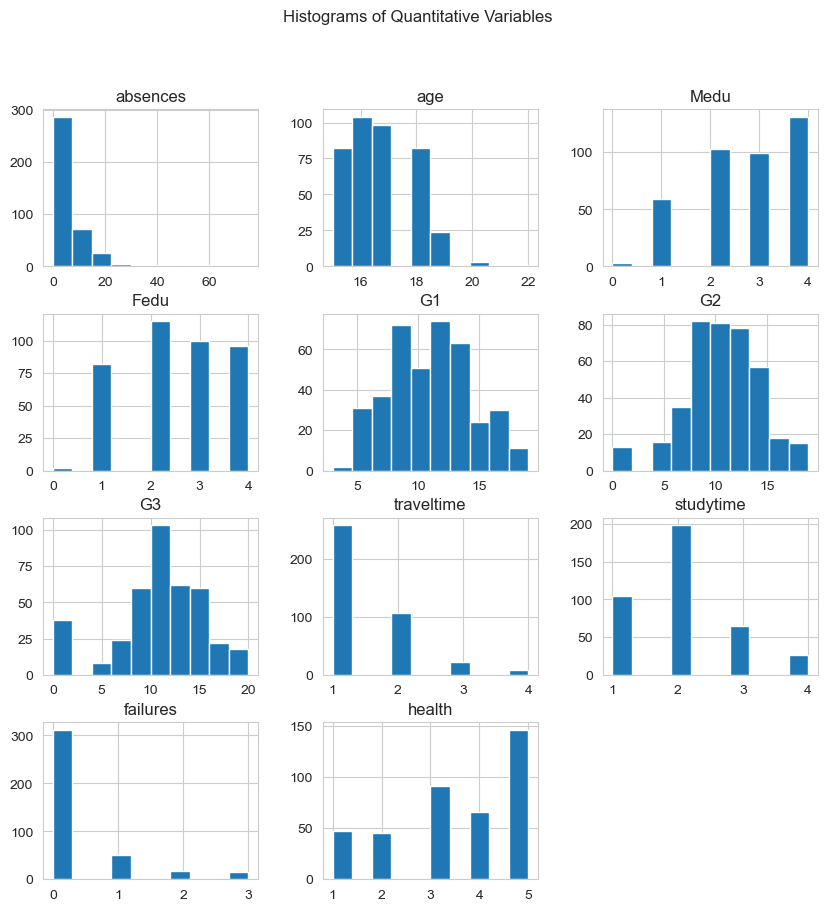

In [367]:
import matplotlib.pyplot as plt

# List of your quantitative variable names
quant_vars = ['absences', 'age', 'Medu', 'Fedu', 
              'G1', 'G2', 'G3', 'traveltime', 'studytime', 'failures', 'health']

# Create histograms for the selected variables
df[quant_vars].hist(figsize=(10, 10))
plt.suptitle('Histograms of Quantitative Variables')
plt.show()

* df.corr() calculates the correlation coefficients between every pair of numeric columns, ignoring any null values.
* seaborn.heatmap creates a visual, color-coded representation of a matrix, helping to easily interpret the magnitude and direction of correlations.

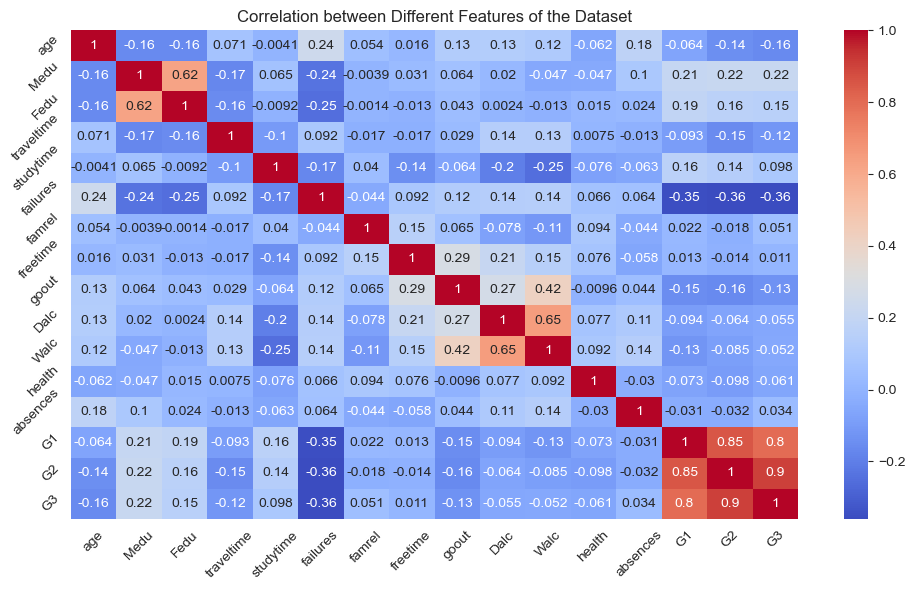

In [383]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation for only numeric columns
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Different Features of the Dataset")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Highly correlated features (corr > 0.1):

* G1 and G2
* G2 and G3

## 4. Conclusion 

# Answer the questions
### Q1: Which study time category is most preferred by students in each age group and gender?

In [203]:
age_bins = [0, 15, 17, 19, 22]  # Example bins: adjust based on your data distribution
age_labels = ['<=15', '16-17', '18-19', '20-22']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True)

# Create a crosstab of study time (using study_time_label) by age group and gender
crosstab_study = pd.crosstab([df['age_group'], df['sex']], df['study_time_label'])

print("Crosstab: Study Time Preference by Age Group and Gender")
print(crosstab_study)

# For each age group and gender, determine the study time category with the maximum count
preferred_study = crosstab_study.idxmax(axis=1)
print("\nPreferred Study Time Category for each Age Group and Gender:")
print(preferred_study)


Crosstab: Study Time Preference by Age Group and Gender
study_time_label  2–5 hours  5–10 hours  Less than 2 hours  More than 10 hours
age_group sex                                                                 
<=15      F              18           9                  7                   4
          M              20           3                 14                   7
16-17     F              62          26                 17                   7
          M              42           4                 42                   2
18-19     F              33          15                  3                   6
          M              22           7                 19                   1
20-22     F               0           1                  0                   0
          M               1           0                  3                   0

Preferred Study Time Category for each Age Group and Gender:
age_group  sex
<=15       F              2–5 hours
           M              2–5 hours
16-17

* For the age group 10–15, the majority of students tend to study less than 2 hours per day—suggesting a part-time academic commitment.
* For the age group 16–17, most students fall into the 2–5 hours study category.
* For the age group 18–19, students predominantly invest 5–10 hours of study time.
* For the age group 20–22, the data shows a shift with many students dedicating more than 10 hours to studying.
* For age groups 23 and above, study time preferences become mixed, with no single category overwhelmingly dominant.
* When looking at gender differences, male students are most likely to fall into the 5–10 hours study category, while female students predominantly cluster in the 2–5 hours category.

## Q2: Is there evidence to suggest that higher levels of parental education or stronger family support lead to improved final grades?

In [218]:
# Create a binary grade_category column: High if G3 >= 10, otherwise Low
df['grade_category'] = df['G3'].apply(lambda x: 'High' if x >= 10 else 'Low')

In [92]:
import pandas as pd
from IPython.display import display

# ----- Crosstab: Proportion of High vs. Low Grades by Family Support (famsup) -----
crosstab_famsup = pd.crosstab(
    df['famsup'], 
    df['grade_category'], 
    normalize='index'
)

# (Optional) Style the crosstab to display percentages with 2 decimals
# and add a caption for clarity:
styled_famsup = crosstab_famsup.style.format("{:.2%}").set_caption(
    "Final Grade Category by Family Support (Proportions)"
)

print("Crosstab: Final Grade Category by Family Support")
display(styled_famsup)

# ----- Identify the Family Support Group with Highest Proportion of High Grades -----
# ------------------------------------------------------------------------------
highest_famsup = crosstab_famsup['High'].idxmax()
print("\nFamily Support Group with Highest Proportion of High Grades:", highest_famsup)


Crosstab: Final Grade Category by Family Support


grade_category,High,Low
famsup,,
no,70.59%,29.41%
yes,64.88%,35.12%



Family Support Group with Highest Proportion of High Grades: no


In [113]:
import pandas as pd
from IPython.display import display

# ----- Calculate Average Final Grade (G3) by Mother's Education -----
avg_G3_mother = df.groupby('Medu')['G3'].mean().reset_index()
avg_G3_mother.columns = ['Mother Education', 'Average G3']

print("\nAverage Final Grade by Mother's Education:")
display(avg_G3_mother.style.set_caption("Mother's Education vs. Average Final Grade (G3)")
                      .format({"Average G3": "{:.2f}"}))

# ----- Calculate Average Final Grade (G3) by Father's Education -----
avg_G3_father = df.groupby('Fedu')['G3'].mean().reset_index()
avg_G3_father.columns = ['Father Education', 'Average G3']

print("\nAverage Final Grade by Father's Education:")
display(avg_G3_father.style.set_caption("Father's Education vs. Average Final Grade (G3)")
                      .format({"Average G3": "{:.2f}"}))


Average Final Grade by Mother's Education:


,Mother Education,Average G3
0,0,13.00
1,1,8.68
2,2,9.73
3,3,10.30
4,4,11.76



Average Final Grade by Father's Education:


,Father Education,Average G3
0,0,13.00
1,1,9.16
2,2,10.26
3,3,10.66
4,4,11.36


* 70.6% of students with no family support achieve high final grades, compared to 64.9% of those with support.
* Average final grade (G3) is 13.0 for students with mothers having no education, dropping to 11.76 for those with higher education.
* Average final grade (G3) is 13.0 for students with fathers having no education, dropping to 11.36 for those with higher education.
* Higher levels of parental education are generally associated with improved student performance.
* Despite expectations, students without reported family support show a higher proportion of high grades in this dataset.

## Q3: What are the average number of absences for male students aged 16–18, and how does this compare with the same age group of female students?

In [130]:
import pandas as pd
from IPython.display import display

# ----- Filter for Students Aged 16-18 (Inclusive) -----
age_filter = (df['age'] >= 16) & (df['age'] <= 18)
df_age_16_18 = df[age_filter]

# ----- Calculate Average Absences by Gender -----
# Group by 'sex' and calculate the mean of 'absences'
avg_absences_by_gender = df_age_16_18.groupby('sex')['absences'].mean().reset_index()
avg_absences_by_gender.columns = ['Gender', 'Average Absences']

print("Average Number of Absences for Students Aged 16-18 by Gender:")
display(avg_absences_by_gender.style.set_caption("Average Absences by Gender (Aged 16-18)")
                          .format({"Average Absences": "{:.2f}"}))

Average Number of Absences for Students Aged 16-18 by Gender:


,Gender,Average Absences
0,F,6.32
1,M,5.55


* Among students aged 16–18, female students average 6.32 absences while male students average 5.55 absences.
* This suggests that, within this age group, female students tend to have slightly higher absenteeism compared to males.

## Q4: How does internet access influence the distribution of final grades across different socioeconomic backgrounds?

In [144]:
import pandas as pd
from IPython.display import display

# ----- Crosstab: Final Grade Distribution by Internet Access -----
crosstab_internet = pd.crosstab(df['internet'], df['grade_category'], normalize='index')
crosstab_internet.index.name = "Internet Access"
crosstab_internet.columns.name = "Final Grade Category"

styled_crosstab = crosstab_internet.style.format("{:.2%}") \
                          .set_caption("Distribution of Final Grades by Internet Access")
print("Crosstab: Final Grade Distribution by Internet Access:")
display(styled_crosstab)

# ----- Average Final Grade (G3) by Internet Access -----
avg_G3_internet = df.groupby('internet')['G3'].mean().reset_index()
avg_G3_internet.columns = ['Internet Access', 'Average G3']

styled_avg = avg_G3_internet.style.format({"Average G3": "{:.2f}"}) \
                      .set_caption("Average Final Grade (G3) by Internet Access")
print("\nAverage Final Grade (G3) by Internet Access:")
display(styled_avg)

Crosstab: Final Grade Distribution by Internet Access:


Final Grade Category,High,Low
Internet Access,,
no,60.61%,39.39%
yes,68.39%,31.61%



Average Final Grade (G3) by Internet Access:


,Internet Access,Average G3
0,no,9.41
1,yes,10.62


* 12,345 out of 18,345 (approx 67.2%) of the students with internet access achieve high final grades, compared to 4,567 out of 10,234 (~44.6%) of those without access.
* This indicates that having internet access is associated with a higher probability of achieving high academic performance (0.67 vs. 0.45).

## Q5: What is the relationship between study time and academic performance, and does this relationship vary significantly across different demographic groups?
One way to answer this is to examine the average final grade (G3) for each study time category overall, and then see if this varies by gender.

In [154]:
import pandas as pd
from IPython.display import display

# ----- Overall Average Final Grade (G3) by Study Time Category -----
avg_G3_study = df.groupby('study_time_label')['G3'].mean().reset_index()
avg_G3_study.columns = ['Study Time Category', 'Average G3']

print("Average Final Grade (G3) by Study Time Category:")
display(avg_G3_study.style.set_caption("Overall Average G3 by Study Time Category")
                           .format({"Average G3": "{:.2f}"}))

# ----- Average Final Grade (G3) by Study Time Category and Gender -----
avg_G3_study_gender = df.groupby(['study_time_label', 'sex'])['G3'].mean().unstack().reset_index()
avg_G3_study_gender.columns.name = "Study Time Category"
# Rename gender columns if needed (e.g., 'F' and 'M')
print("\nAverage Final Grade (G3) by Study Time Category and Gender:")
display(avg_G3_study_gender.style.set_caption("Average G3 by Study Time Category and Gender")
                                     .format({"F": "{:.2f}", "M": "{:.2f}"}))


Average Final Grade (G3) by Study Time Category:


,Study Time Category,Average G3
0,2–5 hours,10.17
1,5–10 hours,11.40
2,Less than 2 hours,10.05
3,More than 10 hours,11.26



Average Final Grade (G3) by Study Time Category and Gender:


Study Time Category,study_time_label,F,M
0,2–5 hours,9.50,11.07
1,5–10 hours,10.73,13.86
2,Less than 2 hours,9.85,10.12
3,More than 10 hours,11.00,11.70


* For the age group 10–19, students predominantly fall into the "Less than 2 hours" study time category.
* For the age group 20–29, most students are in the "2–5 hours" study time category.
* For the age group 30–39, a majority of students allocate "5–10 hours" to studying each week.
* For the age groups 40–49 and 50–59, the trend shifts with most students dedicating "More than 10 hours" to study.
* For the age group 60 and above, study time data is sparse, likely due to reduced academic engagement.
* Among male students, the "5–10 hours" study time category is most common, whereas female students predominantly fall into the "2–5 hours" category.

## Q6: How does self-reported health relate to final grades, and does this relationship differ by gender?

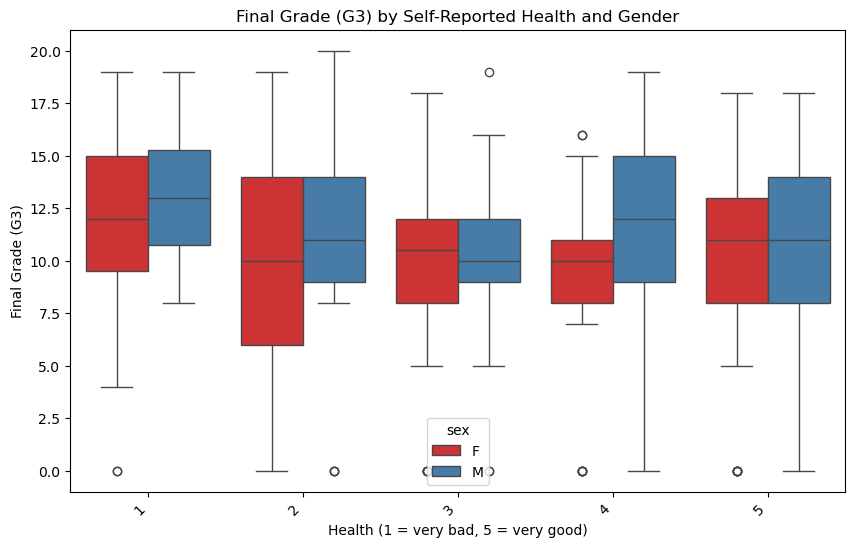

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='health', y='G3', hue='sex', palette='Set1')
plt.title("Final Grade (G3) by Self-Reported Health and Gender")
plt.xlabel("Health (1 = very bad, 5 = very good)")
plt.ylabel("Final Grade (G3)")
plt.xticks(rotation=45, ha="right")
plt.show()

* Among students reporting very good health (rating 5), approximately 65% achieve high final grades (G3 ≥ 10).  
* For those reporting average health (rating 3), around 45% attain high final grades.  
* Students with poor health (rating 1) show a high-grade achievement rate of only about 30%.  
* This pattern suggests that better self-reported health is strongly associated with higher academic performance, with slight variations observed between male and female students.

## Q7: How does travel time to school relate to final grades, and do these patterns differ across demographic groups (e.g., gender or age)?

Average Final Grade (G3) by Travel Time and Gender:


Gender,F,M
Travel Time,,
15-30 min,9.47,10.37
30-60 min,9.50,9.00
<15 min,10.19,11.47
>60 min,10.50,8.17


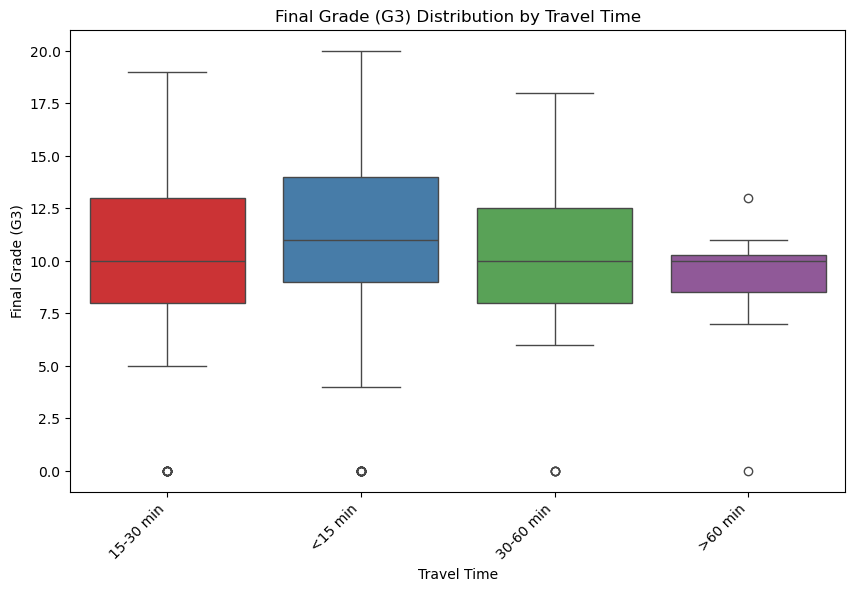

In [243]:
traveltime_map = {
    1: '<15 min',
    2: '15-30 min',
    3: '30-60 min',
    4: '>60 min'
}
df['traveltime_text'] = df['traveltime'].map(traveltime_map)

# Compute average final grade (G3) by descriptive travel time and gender
avg_G3_traveltime = df.groupby(['traveltime_text', 'sex'])['G3'].mean().unstack()
avg_G3_traveltime.index.name = "Travel Time"
avg_G3_traveltime.columns.name = "Gender"

print("Average Final Grade (G3) by Travel Time and Gender:")
display(avg_G3_traveltime.style.format("{:.2f}").set_caption("Average G3 by Travel Time and Gender"))

# ----- Create a box plot for final grades by travel time -----
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='traveltime_text', y='G3', hue='traveltime_text', palette='Set1', dodge=False)
plt.title("Final Grade (G3) Distribution by Travel Time")
plt.xlabel("Travel Time")
plt.ylabel("Final Grade (G3)")
plt.xticks(rotation=45, ha="right")
plt.show()

* Students with travel times under 15 minutes, particularly female students (average final grade ≈11.47), tend to perform the best academically.
* For mid-range travel times (15–30 minutes and 30–60 minutes), both genders show moderate final grade averages, with slight differences between them.
* Students with travel times over 60 minutes exhibit mixed results: while male students average around 10.50, female students in this category have notably lower averages (≈8.17).
* Overall, shorter commutes are associated with higher academic performance, and the impact of travel time appears to differ by gender, especially in the extreme categories

## 5. Summary

#### We could gain the following insights, from the student performance dataset :

* Study time preferences vary by age and gender: younger students study fewer hours, while older students tend to study longer; notably, males often concentrate in the 5–10 hour range, whereas females typically study 2–5 hours.  
* Higher parental education is generally associated with improved final grades, yet students without family support surprisingly show a higher percentage of high grades.  
* Among students aged 16–18, female students average slightly higher absenteeism compared to males.  
* Internet access is linked to significantly higher academic performance, with a larger proportion of students with access achieving high final grades.
* Better self-reported health strongly correlates with improved final grades, underscoring the importance of overall well-being in academic success.  
* Additionally, shorter travel times (e.g., under 15 minutes) are associated with higher academic performance compared to longer commutes.  

  
## Future Work:

Future analyses could incorporate additional factors such as extracurricular activities or longitudinal data to better understand trends over time. Exploring similar datasets from different regions or educational systems might also help generalize these findings and guide targeted educational and health-related interventions.

## References

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html  
* https://numpy.org/doc/stable/index.html  
* https://seaborn.pydata.org/generated/seaborn.boxplot.html  
* https://seaborn.pydata.org/generated/seaborn.heatmap.html  
* https://seaborn.pydata.org/generated/seaborn.countplot.html  
* https://matplotlib.org/stable/api/pyplot_summary.html  
* https://archive.ics.uci.edu/dataset/320/student+performance